## Домашнее задание №3

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev
##### Выполнил: [Колташев Ярослав](https://ekaterinburg.hh.ru/resume/ddbd7e49ff0b3c8d9e0039ed1f6f30544d7656), @koltashev

In [21]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision
from torchvision.datasets import MNIST
from tqdm import tqdm
from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1:
Вернемся к задаче распознавания рукописных цифр, рассмотренной на первом занятии. Все также будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на пример, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9912422/9912422 [00:00<00:00, 17455965.64it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 79694535.41it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27161725.55it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14270059.00it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Text(0.5, 1.0, 'Image label: 5')

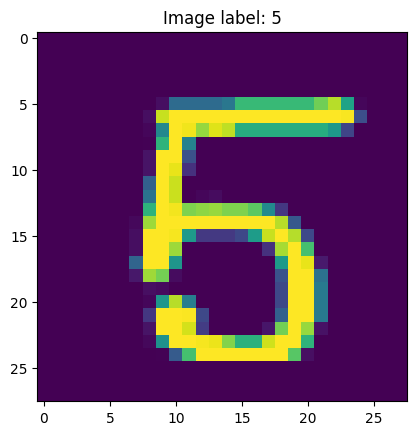

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [5]:
_image.shape

torch.Size([1, 28, 28])

In [37]:
# Creating model instance
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 1024)
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 10)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim = 1)


model = Network() # your code here
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [39]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(train_data_loader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        
        outputs = model(inputs.reshape(-1, 784)) # Получаем предсказания
        loss = criterion(outputs, labels) # Получаем ошибку
        loss.backward() # Обратное распространение ошибки
        optimizer.step() # Обновляем веса

        # Выводим статистику
        running_loss += loss.item()
        mini_batch = 100
        if i % (mini_batch+1) == 0:    # Каждые N минибатчей выводим ошибку
            print(f'epoch: {epoch + 1}, mini_batch: {i + 1}, loss: {running_loss/mini_batch}')
            running_loss = 0.0

print('Finished Training')

7it [00:00, 32.62it/s]

epoch: 1, mini_batch: 1, loss: 0.02308223247528076


110it [00:02, 45.68it/s]

epoch: 1, mini_batch: 102, loss: 0.6804298876971007


210it [00:04, 44.70it/s]

epoch: 1, mini_batch: 203, loss: 0.32937115598469974


310it [00:07, 38.41it/s]

epoch: 1, mini_batch: 304, loss: 0.25788399450480937


410it [00:10, 32.98it/s]

epoch: 1, mini_batch: 405, loss: 0.22292425038293004


514it [00:13, 44.42it/s]

epoch: 1, mini_batch: 506, loss: 0.20799113389104604


614it [00:15, 44.03it/s]

epoch: 1, mini_batch: 607, loss: 0.18722421672195197


714it [00:17, 36.95it/s]

epoch: 1, mini_batch: 708, loss: 0.16158017344772815


814it [00:20, 34.17it/s]

epoch: 1, mini_batch: 809, loss: 0.16469464784488083


913it [00:23, 26.75it/s]

epoch: 1, mini_batch: 910, loss: 0.1625556100718677


1016it [00:27, 34.14it/s]

epoch: 1, mini_batch: 1011, loss: 0.14416812371462584


1113it [00:31, 17.67it/s]

epoch: 1, mini_batch: 1112, loss: 0.12371088319923729


1218it [00:35, 33.95it/s]

epoch: 1, mini_batch: 1213, loss: 0.13388431458268316


1318it [00:38, 25.67it/s]

epoch: 1, mini_batch: 1314, loss: 0.13361149575561285


1421it [00:42, 27.89it/s]

epoch: 1, mini_batch: 1415, loss: 0.1296538920677267


1520it [00:45, 23.74it/s]

epoch: 1, mini_batch: 1516, loss: 0.11964177352376282


1622it [00:48, 34.40it/s]

epoch: 1, mini_batch: 1617, loss: 0.12205105643719434


1722it [00:51, 33.67it/s]

epoch: 1, mini_batch: 1718, loss: 0.1168526972667314


1824it [00:55, 25.60it/s]

epoch: 1, mini_batch: 1819, loss: 0.11025939783547073


1875it [00:57, 32.47it/s]
6it [00:00, 26.50it/s]

epoch: 2, mini_batch: 1, loss: 0.00030780784785747526


106it [00:03, 32.84it/s]

epoch: 2, mini_batch: 102, loss: 0.09637600580230356


206it [00:06, 33.10it/s]

epoch: 2, mini_batch: 203, loss: 0.08048712034127675


309it [00:09, 28.76it/s]

epoch: 2, mini_batch: 304, loss: 0.08630238106707111


408it [00:18, 14.86it/s]

epoch: 2, mini_batch: 405, loss: 0.08782356293871998


511it [00:21, 32.74it/s]

epoch: 2, mini_batch: 506, loss: 0.10841705901315436


611it [00:24, 33.04it/s]

epoch: 2, mini_batch: 607, loss: 0.08459228989202529


712it [00:28, 24.97it/s]

epoch: 2, mini_batch: 708, loss: 0.06848780212691054


812it [00:31, 32.14it/s]

epoch: 2, mini_batch: 809, loss: 0.07591092828777618


916it [00:35, 32.11it/s]

epoch: 2, mini_batch: 910, loss: 0.09240395000204443


1016it [00:38, 30.84it/s]

epoch: 2, mini_batch: 1011, loss: 0.08421616300474852


1116it [00:42, 23.79it/s]

epoch: 2, mini_batch: 1112, loss: 0.07623007096000947


1216it [00:45, 30.62it/s]

epoch: 2, mini_batch: 1213, loss: 0.07709974411525763


1320it [00:49, 30.92it/s]

epoch: 2, mini_batch: 1314, loss: 0.07912419254891574


1420it [00:52, 31.39it/s]

epoch: 2, mini_batch: 1415, loss: 0.08397189049283042


1520it [00:55, 23.72it/s]

epoch: 2, mini_batch: 1516, loss: 0.06775709123234265


1621it [01:00, 28.07it/s]

epoch: 2, mini_batch: 1617, loss: 0.08944342113216408


1724it [01:03, 30.88it/s]

epoch: 2, mini_batch: 1718, loss: 0.07997126281494275


1824it [01:06, 30.74it/s]

epoch: 2, mini_batch: 1819, loss: 0.0696835955773713


1875it [01:08, 27.47it/s]

Finished Training


Локальные тесты для проверки вашей модели доступны ниже:

In [26]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e

print(y_predicted.shape[-1])
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

10
Everything seems fine!


Настройте параметры модели на обучающей выборке. В качестве примера можете воспользоваться ноутбуком с занятия №1. Также рекомендуем поработать с различными оптимизаторами.

In [ ]:
# your code here


Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [27]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [28]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.97917


In [29]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [30]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9692


Проверка, что необходимые пороги пройдены:

In [31]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw03_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [32]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/msu_branch/homeworks/hw03_mnist/hw03_data_dict.npy

--2023-11-19 15:04:07--  https://raw.githubusercontent.com/girafe-ai/ml-course/msu_branch/homeworks/hw03_mnist/hw03_data_dict.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272438 (6.0M) [application/octet-stream]
Saving to: ‘hw03_data_dict.npy.1’

hw03_data_dict.npy. 100%[===================>]   5.98M  --.-KB/s    in 0.1s    

2023-11-19 15:04:07 (52.0 MB/s) - ‘hw03_data_dict.npy.1’ saved [6272438/6272438]



In [33]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw03_data_dict.npy'), 'Please, download `hw03_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw03_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw03.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw03.npy`')
# __________end of block__________

File saved to `submission_dict_hw03.npy`


На этом задание завершено. Поздравляем!